# Regression Week 3: Assessing Fit (polynomial regression)
In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:

Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
Use matplotlib to visualize polynomial regressions
Use matplotlib to visualize the same polynomial degree on different subsets of the data
Use a validation set to select a polynomial degree
Assess the final fit using test data
We will continue to use the House data from previous notebooks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tmp = np.array([1., 2., 3.])
tmp_cubed = tmp**3
print (tmp)
print (tmp_cubed)

[ 1.  2.  3.]
[  1.   8.  27.]


In [8]:
ex_sframe={}
ex_sframe['power_1'] = tmp
print(ex_sframe)

{'power_1': array([ 1.,  2.,  3.])}


## Polynomial_sframe function
Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:

In [3]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe = pd.DataFrame(feature)
    poly_sframe.columns = ['power_1']
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature**power
    return poly_sframe

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [28]:
print(polynomial_sframe(tmp, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


## Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [4]:
# import data
train = pd.read_csv('wk3_kc_house_train_data.csv')
test = pd.read_csv('wk3_kc_house_test_data.csv')
sales = pd.read_csv('kc_house_data.csv')

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [5]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

example_features = poly1_data[['power_1']]

regressor.fit(example_features , poly1_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

print('Intercept: \n', regressor.intercept_)

Coefficients: 
 [ 280.6235679]
Intercept: 
 -43580.7430945


Text(0,0.5,'Price($)')

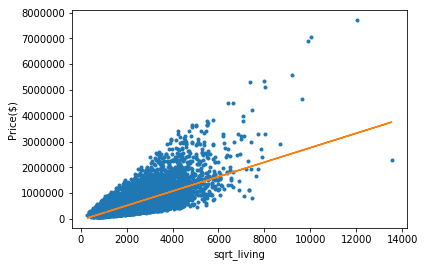

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(example_features,poly1_data['price'],'.',
        example_features, regressor.predict(example_features),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'.

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [9]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
print(poly2_data.head(5))

   power_1  power_2
0     1180  1392400
1     2570  6604900
2      770   592900
3     1960  3841600
4     1680  2822400


In [10]:
#poly2_data['price'] = sales['price'] # add price to the data since it's the target

regressor2 = LinearRegression()

regressor2.fit(poly2_data, sales['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [11]:
# The coefficients
print('Coefficients: \n', regressor2.coef_)

print('Intercept: \n', regressor2.intercept_)

Coefficients: 
 [  6.79940947e+01   3.85812609e-02]
Intercept: 
 199222.279305


Text(0,0.5,'Price($)')

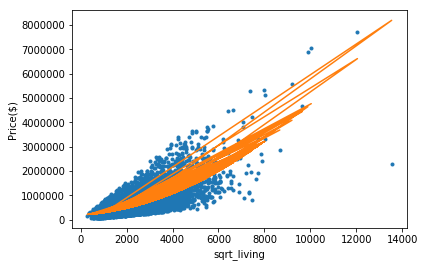

In [16]:
plt.plot(poly2_data['power_1'],sales['price'],'.',
        poly2_data['power_1'], regressor2.predict(poly2_data),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')

   power_1  power_2      power_3
0     1180  1392400   1643032000
1     2570  6604900  16974593000
2      770   592900    456533000
3     1960  3841600   7529536000
4     1680  2822400   4741632000
Coefficients: 
 [ -9.01819864e+01   8.70465089e-02  -3.84055260e-06]
Intercept: 
 336819.748221


(0, 8000)

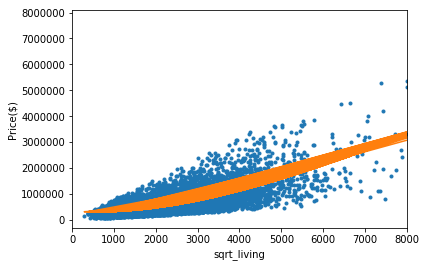

In [17]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
print(poly3_data.head(5))

regressor3 = LinearRegression()

regressor3.fit(poly3_data, sales['price'])

print('Coefficients: \n', regressor3.coef_)

print('Intercept: \n', regressor3.intercept_)

#plt.plot(example_features,poly1_data['price'],'.',
 #       example_features, regressor3.predict(poly3_data),'-')

plt.plot(poly3_data['power_1'], poly1_data['price'],'.',
         poly3_data['power_1'], regressor3.predict(poly3_data),'-')

plt.xlabel('sqrt_living')
plt.ylabel('Price($)')
plt.xlim(0, 8000)

Now try a 15th degree polynomial:

In [18]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
print(poly15_data.head(2))

   power_1  power_2      power_3         power_4             power_5  \
0     1180  1392400   1643032000   1938777760000    2287757756800000   
1     2570  6604900  16974593000  43624704010000  112115489305700000   

               power_6              power_7              power_8  \
0  2699554153024000000 -5812824183432429568  3056258969686310912   
1 -7011097663703825856  3947964295399478912   558998636407415040   

               power_9             power_10             power_11  \
0 -9176254217225240576   258794941722918912 -8216618020018061312   
1 -2219542182288373248 -4179489704867798016 -5283490611281860608   

              power_12             power_13             power_14  \
0  7378119149911801856  -682605894982172672  6181783164256518144   
1 -1767232744151773184 -3889110337507385344  3121720556596641792   

              power_15  
0  8040224707418521600  
1 -1511841610285547520  


In [19]:
regressor15 = LinearRegression()

regressor15.fit(poly15_data, sales['price'])

print('Coefficients: \n', regressor15.coef_)

print('Intercept: \n', regressor15.intercept_)

Coefficients: 
 [  1.71431053e-05   4.22072760e-02   4.59418603e-06  -4.52064104e-10
  -2.28008246e-14  -2.23132861e-16  -5.20307221e-16   3.45489427e-16
  -1.96445484e-16  -2.74086309e-16   9.88792381e-17   7.25114413e-16
   4.30211422e-16  -4.05925293e-16   4.16333634e-17]
Intercept: 
 279907.912897


Text(0,0.5,'Price($)')

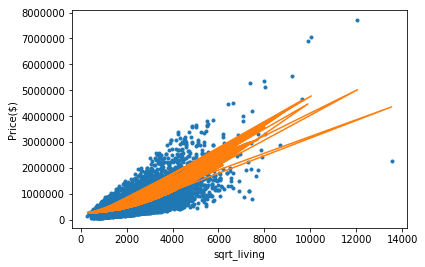

In [73]:
plt.plot(poly15_data['power_1'],poly1_data['price'],'.',
        poly15_data['power_1'], regressor15.predict(poly15_data),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')

## Changing the data and re-learning
We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:

First split sales into 2 subsets with .random_split(0.5, seed=0).
Next split the resulting subsets into 2 more subsets each. Use .random_split(0.5, seed=0).
We set seed=0 in these steps so that different users get consistent results. You should end up with 4 subsets (set_1, set_2, set_3, set_4) of approximately equal size.

In [20]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv')


set_1
Coefficients: 
 [  1.76531516e-05   4.45485560e-02   4.13484705e-06  -4.47942626e-10
  -2.26725488e-14   1.13079318e-16  -7.14662292e-16   2.98226694e-16
  -1.71939509e-16  -1.28022593e-15   1.24900090e-16   5.48172618e-16
   1.99493200e-16  -3.13768109e-16  -3.74700271e-16]
Intercept: 
 274604.208473
set_2
Coefficients: 
 [  3.01077950e-05   6.13896006e-02  -2.51772870e-06   1.12606184e-10
  -1.76970126e-14   7.97392942e-16  -3.66212831e-16  -2.92456358e-16
  -6.04003084e-16   3.78169718e-16   7.16874476e-16   7.65013053e-16
   1.04777298e-15  -4.71844785e-16   1.35308431e-15]
Intercept: 
 255762.247205
set_3
Coefficients: 
 [  3.05328298e-05   6.76493199e-02  -5.32013562e-06   4.59114059e-10
  -1.32416485e-14  -1.64590229e-16  -3.54740744e-16   5.68890795e-16
   4.36171227e-16   5.27355937e-16  -2.15105711e-16   1.13103971e-15
   6.14092110e-16   3.12250226e-16  -2.70616862e-16]
Intercept: 
 251978.308938
set_4
Coefficients: 
 [  2.93005887e-05   5.47864575e-02  -1.45066791e-06

Text(0,0.5,'Price($)')

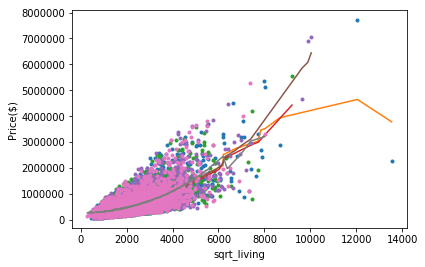

In [21]:
# Set_1
poly15_set_1 = polynomial_sframe(set_1['sqft_living'], 15)
regressor15_set1 = LinearRegression()

regressor15_set1.fit(poly15_set_1, set_1['price'])

print('set_1')
print('Coefficients: \n', regressor15_set1.coef_)

print('Intercept: \n', regressor15_set1.intercept_)

plt.plot(set_1['sqft_living'],set_1['price'],'.',
        set_1['sqft_living'], regressor15_set1.predict(poly15_set_1),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')

# Set 2
print('set_2')
poly15_set_2 = polynomial_sframe(set_2['sqft_living'], 15)
regressor15_set2 = LinearRegression()

regressor15_set2.fit(poly15_set_2, set_2['price'])

print('Coefficients: \n', regressor15_set2.coef_)

print('Intercept: \n', regressor15_set2.intercept_)

plt.plot(set_2['sqft_living'],set_2['price'],'.',
        set_2['sqft_living'], regressor15_set2.predict(poly15_set_2),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')

# set 3
print('set_3')

poly15_set_3 = polynomial_sframe(set_3['sqft_living'], 15)
regressor15_set3 = LinearRegression()

regressor15_set3.fit(poly15_set_3, set_3['price'])

print('Coefficients: \n', regressor15_set3.coef_)

print('Intercept: \n', regressor15_set3.intercept_)

plt.plot(set_3['sqft_living'],set_3['price'],'.',
        set_3['sqft_living'], regressor15_set3.predict(poly15_set_3),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')

#set 4
print('set_4')

poly15_set_4 = polynomial_sframe(set_4['sqft_living'], 15)
regressor15_set4 = LinearRegression()

regressor15_set4.fit(poly15_set_4, set_4['price'])

print('Coefficients: \n', regressor15_set4.coef_)

print('Intercept: \n', regressor15_set4.intercept_)

plt.plot(set_4['sqft_living'],set_4['price'],'.',
        set_4['sqft_living'], regressor15_set4.predict(poly15_set_4),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')

## Ask some questions 

Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?

Quiz Question: (True/False) the plotted fitted lines look the same in all four plots

## Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

Split our sales data into 2 sets: training_and_validation and testing. Use random_split(0.9, seed=1).
Further split our training data into two sets: training and validation. Use random_split(0.5, seed=1).
Again, we set seed=1 to obtain consistent results for different users.

In [32]:
sales = pd.read_csv('kc_house_data.csv')
sales = sales.sort_values(by=['sqft_living','price'])
#sales = sales.DataFrame.sort(['sqft_living', 'price'])

from sklearn.model_selection  import train_test_split
training_and_validation, testing = train_test_split(sales, test_size =0.1, random_state=1)
training, validation = train_test_split(training_and_validation, test_size =0.5, random_state = 1)

print(training.shape)
print(validation.shape)
print(testing.shape)

(9725, 21)
(9726, 21)
(2162, 21)


Next you should write a loop that does the following:

For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
Add train_data['price'] to the polynomial SFrame
Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
Report which degree had the lowest RSS on validation data (remember python indexes from 0)
(Note you can turn off the print out of linear_regression.create() with verbose = False)

    degree    Validation
1        1  6.887743e+14
2        2  6.234087e+14
3        3  6.261843e+14
4        4  6.192693e+14
5        5  6.195233e+14
6        6  6.194884e+14
7        7  6.194690e+14
8        8  6.194463e+14
9        9  6.194105e+14
10      10  6.194324e+14
11      11  6.194416e+14
12      12  6.191283e+14
13      13  6.192782e+14
14      14  6.192379e+14
15      15  6.194692e+14


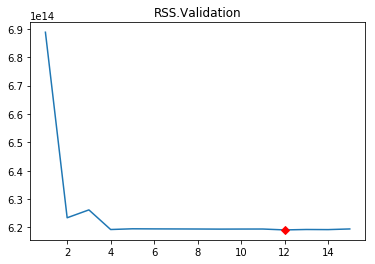

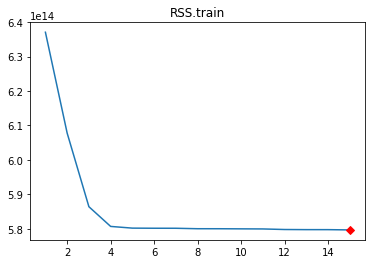

In [33]:
sales = pd.read_csv('kc_house_data.csv')
sales = sales.sort_values(by=['sqft_living','price'])
#sales = sales.DataFrame.sort(['sqft_living', 'price'])

from sklearn.model_selection  import train_test_split
training_and_validation, testing = train_test_split(sales, test_size =0.1, random_state=1)
training, validation = train_test_split(training_and_validation, test_size =0.5, random_state = 1)

RSSValidation = {}
RSSTraining = {}
ploy_set =[]
for degree in range(1, 16):
    del ploy_set[:]
    poly_set= polynomial_sframe(training['sqft_living'], degree)
    regressor_set = LinearRegression()
    regressor_set.fit(poly_set,training['price'])
    
    RSSTraining[degree] = ((regressor_set.predict( \
                    poly_set) - \
                    training['price']) ** 2).sum()
                           
    RSSValidation[degree] = ((regressor_set.predict( \
                    polynomial_sframe(validation['sqft_living'], degree)) - \
                    validation['price']) ** 2).sum()

#RSS = pd.DataFrame(RSSValidation.items(),['degree', 'Validation'])
RSS = pd.Series(RSSValidation, name='Validation')
RSS_train = pd.Series(RSSTraining, name='train')

#RSS.index.name = 'degree'
#RSS.reset_index()
RSS = pd.DataFrame(RSS,columns=['degree','Validation'])
RSS_train = pd.DataFrame(RSS_train,columns=['degree','train'])

RSS['degree'] = range(1,16)
RSS_train['degree'] = range(1,16)

print(RSS)

plt.figure()
plt.plot(RSS['degree'], RSS['Validation'],'-',
    RSS['degree'][RSS['Validation'].argmin()], RSS['Validation'].min(),'rD')
plt.title("RSS.Validation")
plt.show()

plt.figure()
plt.plot(RSS_train['degree'], RSS_train['train'],'-',
    RSS_train['degree'][RSS_train['train'].argmin()], RSS_train['train'].min(),'rD')
plt.title("RSS.train")
plt.show()

## Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?

In [35]:
degree = 12

poly_set= polynomial_sframe(training['sqft_living'], degree)
regressor_set = LinearRegression()
regressor_set.fit(poly_set,training['price'])

RSS_test = ((regressor_set.predict( \
                    polynomial_sframe(test['sqft_living'], degree)) - \
                    test['price']) ** 2).sum()
print('RSS of TEST data is：' + str(RSS_test))

RSS of TEST data is：135991450369589.58
